---
title: 决策树通俗理解和代码实践
date: 2018-10-26 8:17:55
tags: [决策树, 机器学习]
toc: true
xiongzhang: true

---
<span></span>
<!-- more -->

> 声明: 本文由[DataScience](http://mlln.cn)原创发表, 转载请注明[本文链接](http://mlln.cn)mlln.cn, 并在文后留言`转载`.

本文代码运行环境:

- windows10
- python3.6
- jupyter notebook

## 理论模型

决策树模型是一个模拟人类决策过程的模型, 以找对象为例, 我们在判断是否见面时, 可能有如下的思想过程:

<img src="tree.png" />

决策树基于“树”结构进行决策 

- 每个“内部结点”对应于某个属性上的"判断标准"
- 每个分支对应于该属性的某些取值
- 每个“叶结点”对应于一个“预测结果”



### 基本流程

数据整理: 搜集一些相亲对象的数据, 包括年龄/长相/收入/是否公务员, 另外自己贴上标签(见面/不见面)

学习过程：通过对训练样本的分析来确定“划分属性” （即内部结点所对应的属性）

预测过程：将测试示例从根结点开始，沿着划分属性 所构成的“判定测试序列”下行，直到叶结

### 信息熵

信息熵是度量样本纯度的一种指标, 比如上面的例子中, 你比较人性, 不管什么条件的人, 你都不见, 那么样本的信息熵就是0, 也就是样本纯度越高, 信息熵越小。为了便于理解, 后面我都说纯度来代表信息熵。有些算法会使用信息增益率/基尼系数等, 这里不做具体算法解释。

### 属性选择

训练阶段, 如何构建一课决策树? 为什么第一个节点选择了"年龄"这个属性, 而不是其他?

属性选择的流程是这样的:

- 遍历所有属性, 假设使用这个属性进行分类, 计算分类后的样本的纯度
- 选择属性使得分类后样本的纯度最高


### 停止条件

三种停止条件：

- 1. 当前结点包含的样本全属于同一类别，无需划分; 
- 2. 当前属性集为空, 或是所有样本在所有属性上取值相同，无法划 分; 
- 3. 当前结点包含的样本集合为空，不能划分

## 用决策树模型完成分类问题

#### 把需要的工具库import进来

In [1]:
#用于数据处理和分析的工具包
import pandas as pd
#引入用于数据预处理/特征工程的工具包
from sklearn import preprocessing
#import决策树建模包
from sklearn import tree
#可视化用到的
import pydotplus
from IPython.display import display, Image


### 案例1: 鸢尾花分类

#### 读取数据

In [8]:
from sklearn.datasets import load_iris
iris = load_iris()
dir(iris)

['DESCR', 'data', 'feature_names', 'target', 'target_names']

In [10]:
iris_feature_name = iris.feature_names
iris_features = iris.data
iris_target_name = iris.target_names
iris_target = iris.target

In [11]:
iris_feature_name

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [12]:
iris_target_name

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

#### 构建模型



In [14]:
clf = tree.DecisionTreeClassifier(max_depth=4)
clf = clf.fit(iris_features, iris_target)
clf

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

#### 可视化

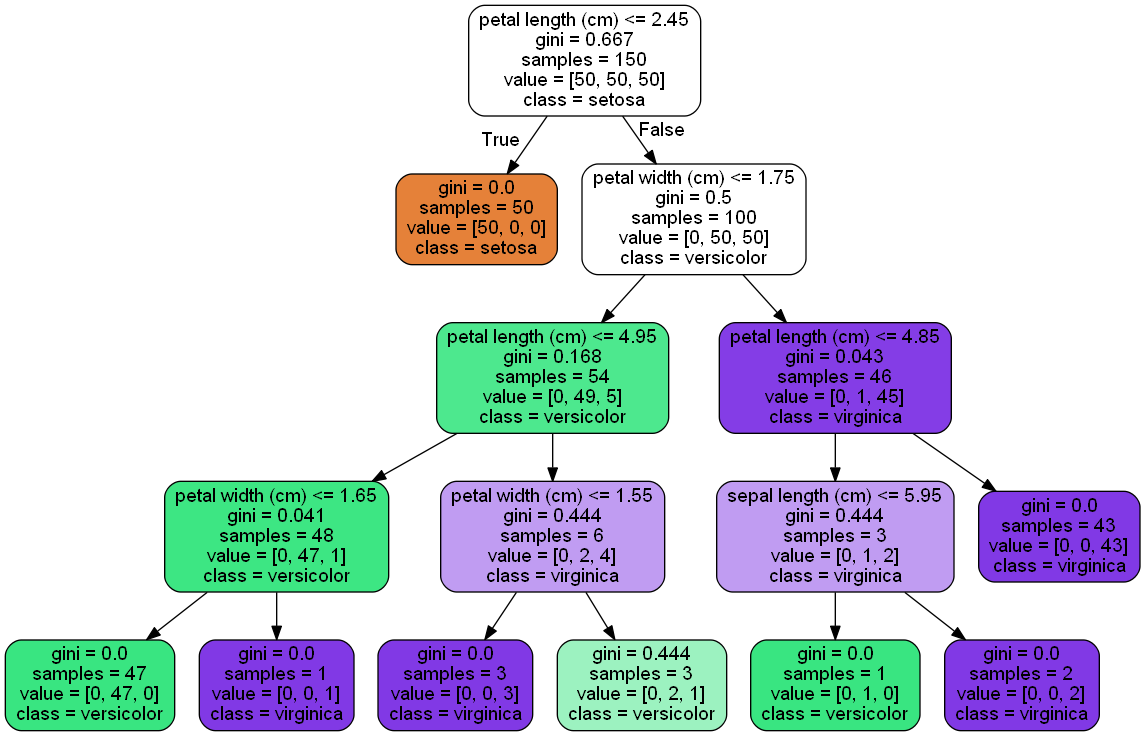

In [15]:
dot_data = tree.export_graphviz(clf,
                                out_file = None,
                                feature_names = iris_feature_name,
                                class_names = iris_target_name,
                                filled=True,
                                rounded=True
                               )
graph = pydotplus.graph_from_dot_data(dot_data)
display(Image(graph.create_png()))

### 案例2: 收入分类

#### 读取数据

In [33]:
adult_data = pd.read_csv('./DecisionTree.csv')
#读取前5行，了解一下数据
adult_data.head(5)

workclass   education       marital-status          occupation  \
0          State-gov   Bachelors        Never-married        Adm-clerical   
1   Self-emp-not-inc   Bachelors   Married-civ-spouse     Exec-managerial   
2            Private     HS-grad             Divorced   Handlers-cleaners   
3            Private        11th   Married-civ-spouse   Handlers-cleaners   
4            Private   Bachelors   Married-civ-spouse      Prof-specialty   

     relationship    race   gender  native-country  income  
0   Not-in-family   White     Male   United-States   <=50K  
1         Husband   White     Male   United-States   <=50K  
2   Not-in-family   White     Male   United-States   <=50K  
3         Husband   Black     Male   United-States   <=50K  
4            Wife   Black   Female            Cuba   <=50K

In [20]:
adult_data.shape

(32561, 9)

In [21]:
adult_data.columns

Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'gender', 'native-country', 'income'],
      dtype='object')

#### 区分一下特征(属性)和目标

In [22]:
feature_columns = [u'workclass', u'education', u'marital-status', u'occupation', u'relationship', u'race', u'gender', u'native-country']
label_column = ['income']

In [35]:
#区分特征和目标列
features = adult_data[feature_columns]
label = adult_data[label_column]
features.head(2)

workclass   education       marital-status        occupation  \
0          State-gov   Bachelors        Never-married      Adm-clerical   
1   Self-emp-not-inc   Bachelors   Married-civ-spouse   Exec-managerial   

     relationship    race gender  native-country  
0   Not-in-family   White   Male   United-States  
1         Husband   White   Male   United-States

#### 特征处理/特征工程

In [34]:
features = pd.get_dummies(features)
features[features.columns[:5]].head(10)

workclass_ ?  workclass_ Federal-gov  workclass_ Local-gov  \
0             0                       0                     0   
1             0                       0                     0   
2             0                       0                     0   
3             0                       0                     0   
4             0                       0                     0   
5             0                       0                     0   
6             0                       0                     0   
7             0                       0                     0   
8             0                       0                     0   
9             0                       0                     0   

   workclass_ Never-worked  workclass_ Private  
0                        0                   0  
1                        0                   0  
2                        0                   1  
3                        0                   1  
4                        0                   1  
5                        0                   1  
6                        0                   1  
7                        0                   0  
8                        0                   1  
9                        0                   1

#### 构建模型

In [31]:
#初始化一个决策树分类器
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=4)
#用决策树分类器拟合数据
clf = clf.fit(features.values, label.values)
clf

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

#### 将模型用于预测

In [15]:
clf.predict(features.values)

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' >50K'], dtype=object)

#### 可视化一下这颗决策树

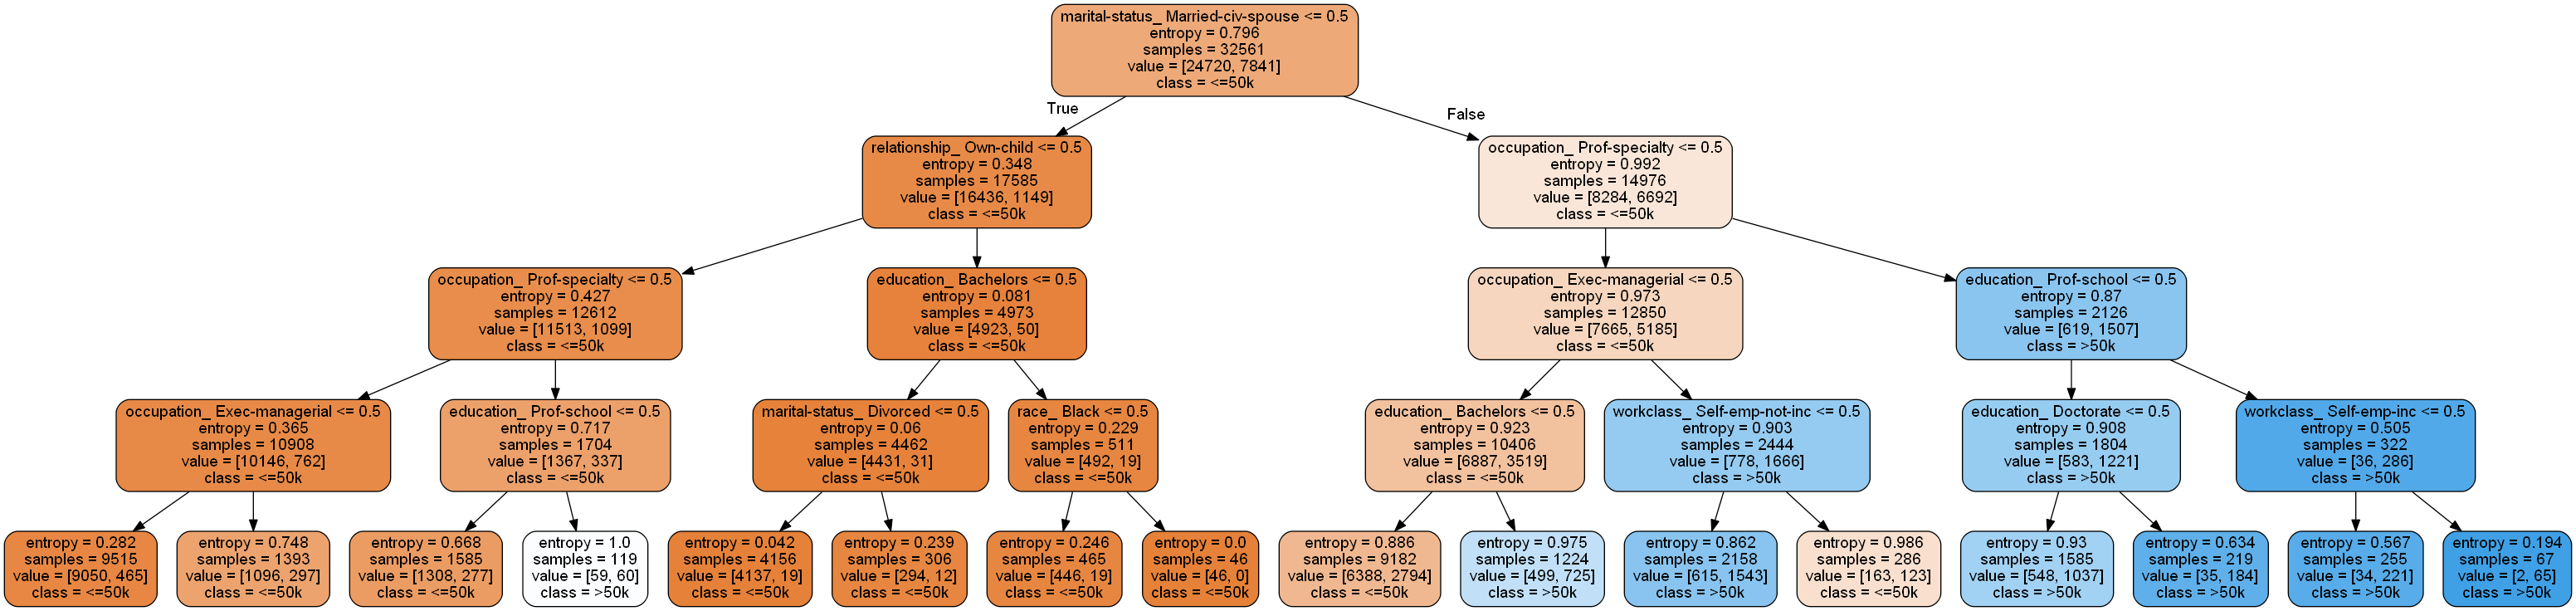

In [32]:
dot_data = tree.export_graphviz(clf, 
                                out_file=None, 
                                feature_names=features.columns,
                                class_names = ['<=50k', '>50k'],
                                filled = True,
                                rounded =True
                               )
graph = pydotplus.graph_from_dot_data(dot_data)
display(Image(graph.create_png()))